In [64]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [65]:
import sys
!{sys.executable} -m pip install xgboost

In [66]:
#read in both the train and test files
train = pd.read_csv('train.csv')

In [68]:
# check column names
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [69]:
# purchase amount is the target variable.  
# Numerical categories are Age, Occupation, Stay in current city in years, Marital Status, Product cat 1, Product cat2, Product cat 3, 
# Non numerical categories are Gender, City Category

In [70]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [71]:
train.shape

(550068, 12)

In [72]:
test.shape

(233599, 11)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [74]:
#check for null data
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [75]:
#fill all empty category info with number 0
train['Product_Category_2'].fillna(0,inplace=True)
train['Product_Category_3'].fillna(0,inplace=True)

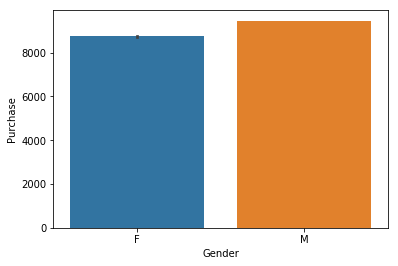

In [76]:
#plot to show gender against purchase in the dataset
sns.barplot(x='Gender',y='Purchase',data=train)

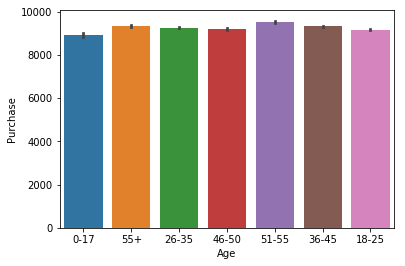

In [77]:
#plot to show age against purchase in the dataset
sns.barplot(x='Age',y='Purchase',data=train)

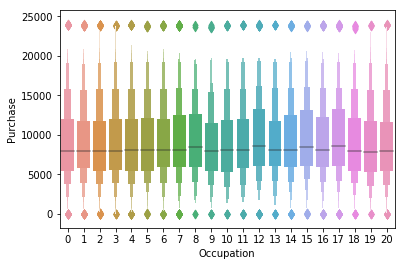

In [78]:
#plot to show occupation against purchase 
sns.boxenplot(x='Occupation',y='Purchase',data=train)

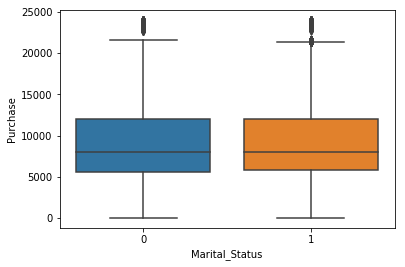

In [79]:
#plot to show marital status against purchase 
sns.boxplot(x='Marital_Status',y='Purchase',data=train)

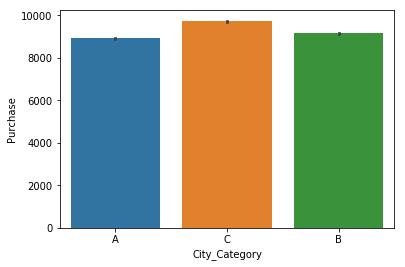

In [80]:
#plot to show gender against purchase 
sns.barplot(x='City_Category',y='Purchase',data=train)

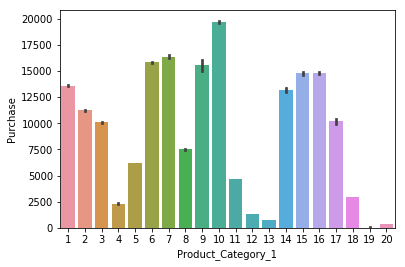

In [223]:
sns.barplot(x='Product_Category_1',y='Purchase',data=train)

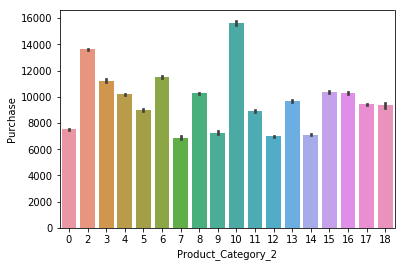

In [224]:
sns.barplot(x='Product_Category_2',y='Purchase',data=train)

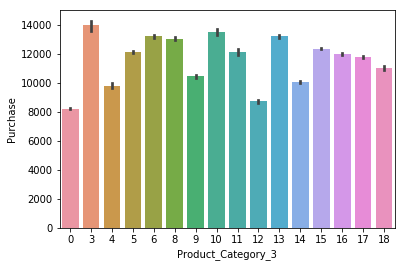

In [225]:
sns.barplot(x='Product_Category_3',y='Purchase',data=train)

In [81]:
genderpurchase = train.groupby(['Gender'])['Purchase'].sum()

In [82]:
genderpurchase.head()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [227]:
genderagepurchase = train.groupby(['Gender','Age'])['Purchase'].sum()

In [229]:
genderagepurchase.head(10)

Gender  Age
0       0      1143846664
        1        42385978
1       0      3817052895
        1        92527205
Name: Purchase, dtype: int64

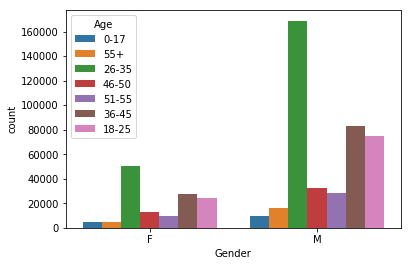

In [83]:
sns.countplot(train['Gender'],hue=train["Age"])

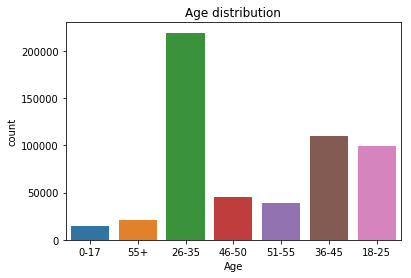

In [84]:
sns.countplot(train['Age'])
plt.title("Age distribution")
plt.show()

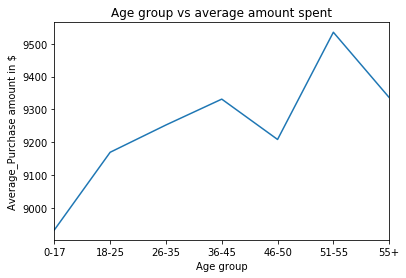

In [85]:
#Using groupby to show the mean purchage in the different age groups
train.groupby('Age')['Purchase'].mean().plot()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

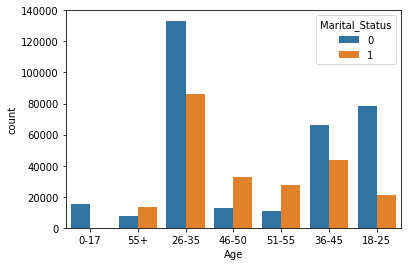

In [86]:
#the number of single people is higher in the 20s but decreases as age goes up
sns.countplot(train['Age'],hue=train["Marital_Status"])

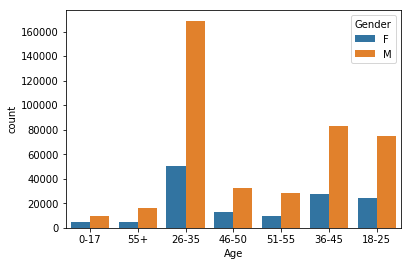

In [87]:
#there are more males in each age group
sns.countplot(train['Age'],hue=train["Gender"])


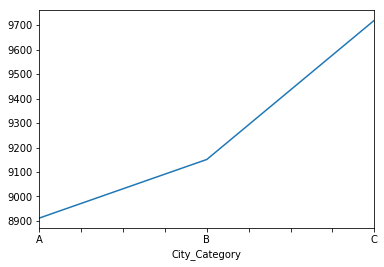

In [88]:
train.groupby('City_Category')['Purchase'].mean().plot()

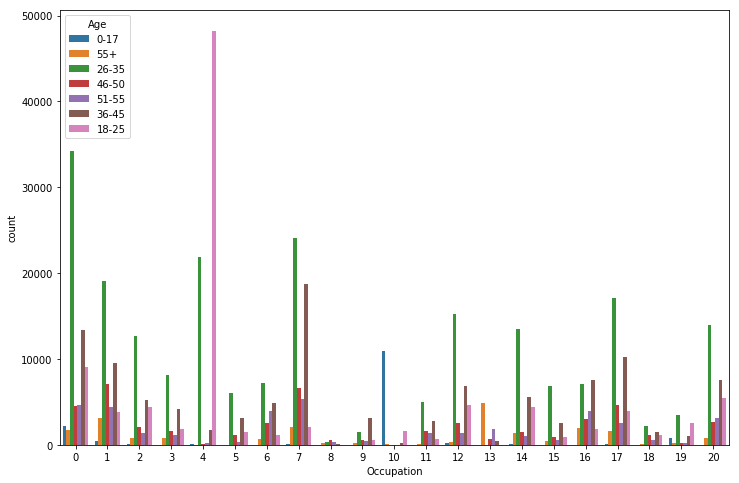

In [89]:
plt.figure(figsize=[12,8])
sns.countplot(train['Occupation'],hue=train["Age"])

In [90]:
data1= train.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()

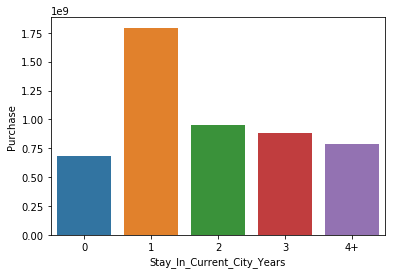

In [91]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=data1)

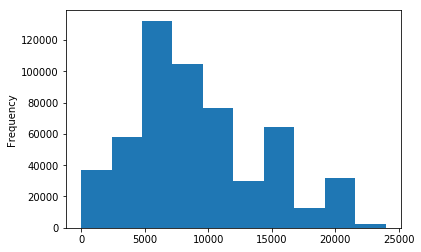

In [92]:
train['Purchase'].plot(kind='hist')

In [221]:
train.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.034945,0.117291,0.003349,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,-0.034945,1.000000,0.017627,0.043744,-0.009817,-0.139961,-0.013681,-0.009959,-0.000527,-0.011055
Occupation,0.117291,0.017627,1.000000,0.025638,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,0.003349,0.043744,0.025638,1.000000,-0.000671,0.019456,-0.001133,0.011129,0.021391,0.044413
Stay_In_Current_City_Years,0.014660,-0.009817,0.030005,-0.000671,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,-0.011603,-0.139961,0.024280,0.019456,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.045594,-0.013681,-0.007618,-0.001133,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,-0.000954,-0.009959,0.006712,0.011129,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.036146,-0.000527,0.012269,0.021391,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.060346,-0.011055,0.020833,0.044413,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


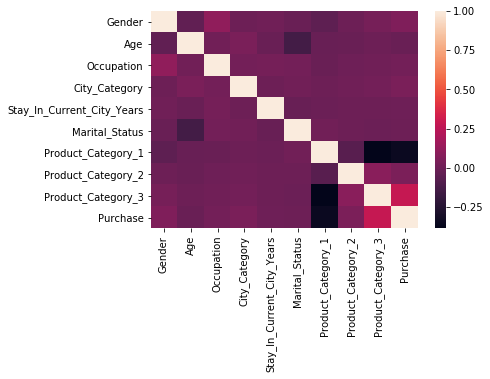

In [222]:
#are product category 2 and 3 highly correlated?
#if it is a very light colour it is and as we can see they are not.  None of the variables are highly correlated.
sns.heatmap(train.corr())

In [93]:
#data prep

In [94]:
#Product_categories are all made into integegers
train[['Product_Category_2','Product_Category_3']]=train[['Product_Category_2','Product_Category_3']].astype('int')



In [95]:
#change the 4+ label to 4 
train['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)


In [96]:
#and make sure it comes out as a integer
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].fillna(0.0).astype(int)

In [97]:
#change male and female to numeric values
train['Gender'].replace({"M":1,"F":0},inplace=True)

In [98]:
#change the city categories to numeric categories
train['City_Category']=train['City_Category'].map({"B":1,"A":2,"C":3})

In [99]:
#use pd get dummies to change the ages to numeric values
train['Age']=pd.get_dummies(train['Age'])

In [100]:
#drop the userid and product id
train = train.drop(["User_ID","Product_ID"],axis=1)

In [135]:
from sklearn.model_selection import train_test_split
X = train.drop("Purchase",axis=1) #now we can use all the variables for x except the target variable
y = train['Purchase'] #this is the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #split the dataset

In [102]:
#use sklearn to import the algorithms we will use
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [103]:
dtr = DecisionTreeRegressor()

In [104]:
dtr.fit(X_train,y_train)
d_predict= dtr.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test,d_predict))

3246.4901599787804

In [115]:
#import more ensemble methods to try.  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgboost


In [122]:
rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()


In [123]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [124]:
#use feature importances to see rank the importance of the features in predicting
rfc.feature_importances_

array([0.0135358 , 0.00326223, 0.06195467, 0.01540956, 0.04088353,
       0.01620671, 0.80744818, 0.02494327, 0.01635604])

In [137]:
feature_importances = pd.Series(rfc.feature_importances_,X.columns[::])
print(feature_importances)

Gender                        0.013536
Age                           0.003262
Occupation                    0.061955
City_Category                 0.015410
Stay_In_Current_City_Years    0.040884
Marital_Status                0.016207
Product_Category_1            0.807448
Product_Category_2            0.024943
Product_Category_3            0.016356
dtype: float64


In [138]:
newfi = feature_importances.sort_values(ascending=False)

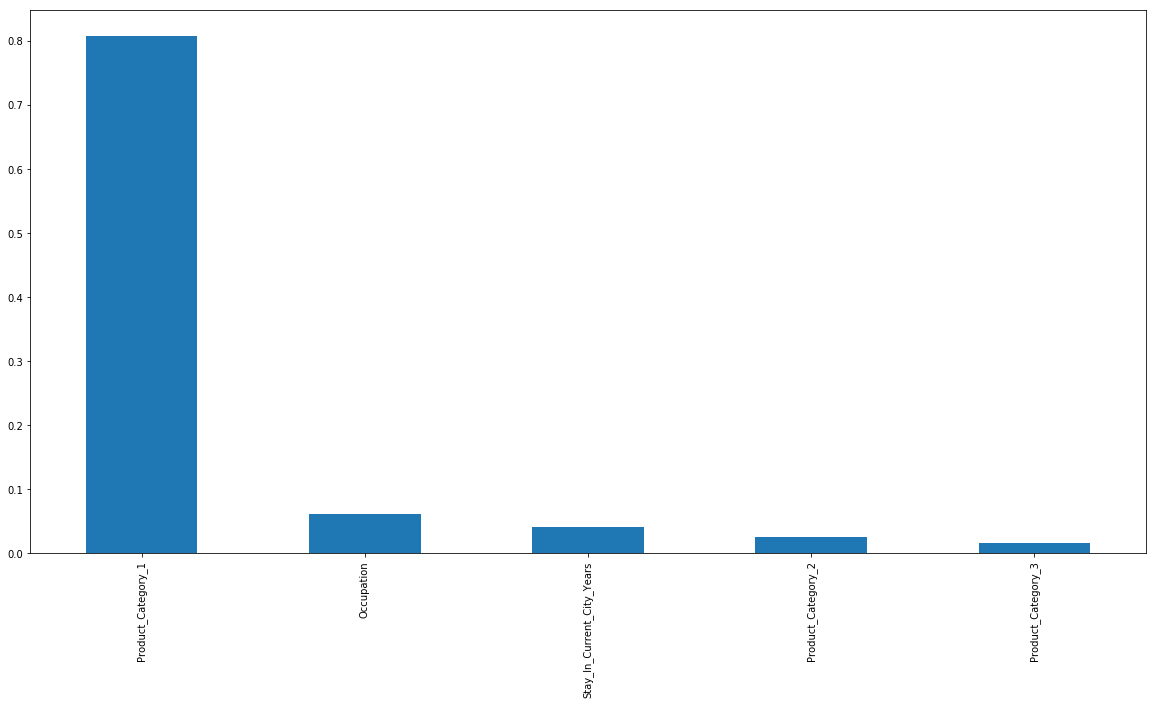

In [139]:
newfi[0:5].plot.bar(figsize=(20,10)) 
plt.show()

In [ ]:
#As we can see product category 1 is the main determining factor in the random forest model as important.

In [111]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [112]:
#check the RMSE for all the models
print("RMSE score for Decision tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))
print("RMSE score for Random_Forest : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))

RMSE score for Decision tree :  3246.4901599787804
RMSE score for Random_Forest :  3067.938060662859
RMSE score for Gradient Boosting :  2988.739593302579


In [119]:
# so gradient boosting gave the best score followed by random forest and then decision tree.

In [188]:
#read in the test set
test = pd.read_csv('test.csv')

In [189]:
#check the head of the dataset - so this dataset doesnt have purchase values so this is what we are going to try to predict.
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [190]:
#look at the datatypes in the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [191]:
#check for null values
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [192]:
#fill null values with the median and make sure the data type is converted to a integer
test['Product_Category_2']=test['Product_Category_2'].fillna(9.0).astype(int)
test['Product_Category_3']=test['Product_Category_3'].fillna(13.0).astype(int)

In [193]:
#make sure the 4+ years for stay in current years is changed to 4 and makes sure it is a integer type
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace({'4+':4})
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

In [194]:
#use pd.getdummies to change the age ranges to values the algorith can deal with
test['Age']=pd.get_dummies(test['Age'])

In [195]:
#change city category to numeric values
test['City_Category']=test['City_Category'].map({"B":1,"A":2,"C":3})
test['City_Category']=test['City_Category'].astype(int)

In [196]:
#change the gender to 1 or 0
test['Gender'].replace({"M":1,"F":0},inplace=True)

In [197]:
#the user id and the product ID are not useful to us 
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [198]:
from sklearn.model_selection import train_test_split
X = train.drop("Purchase",axis=1)
y = train['Purchase']

In [199]:
#use our best model gradient boost to make predictions and add our purchase predictions to the test.csv
gbr.fit(X,y)
test_predict=gbr.predict(test)

In [200]:
test['Purchase']=test_predict

Purchase distribution for the test data AxesSubplot(0.125,0.125;0.775x0.755)


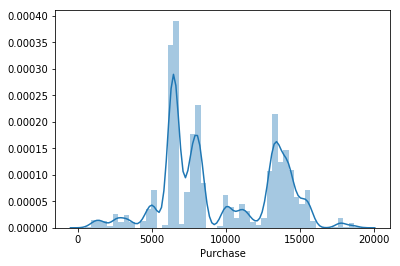

In [201]:
#show the purchase distributions from our predictions using a seaborn distplot
print("Purchase distribution for the test data", sns.distplot(test['Purchase']))

In [202]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,7,1,2,1,1,11,13,13383.357891
1,1,0,17,3,0,0,3,5,13,10312.050392
2,0,0,1,1,4,1,5,14,13,6215.186534
3,0,0,1,1,4,1,4,9,13,3456.059118
4,0,0,1,3,1,0,4,5,12,2882.575600


In [220]:
#work out the total purchases from our test data 
print(f'The total purchases value in $ for black friday is :',test['Purchase'].sum())

The total purchases value in $ for black friday is : 2221951842.557102
